In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

seed=2024
np.random.seed(seed)

In [2]:
prefix="7C"

In [3]:
df = pd.read_csv('../../dataset/dataframes/all_patchs_dataframe.csv')
df=df.sort_values(by='Patient')

In [4]:
df_count=pd.DataFrame()
df_count['classe']=df['classe'].value_counts().index
df_count['count']=df['classe'].value_counts().values
df_count

,classe,count
0,Réactionnel,6019
1,Fibrose,2311
2,Solide,1822
3,Normal,1746
4,Nécrose,1538
5,Lépidique,1365
6,Glandulaire complexe,1335
7,Papillaire,1150
8,Acinaire,1132
9,Mucineux,822


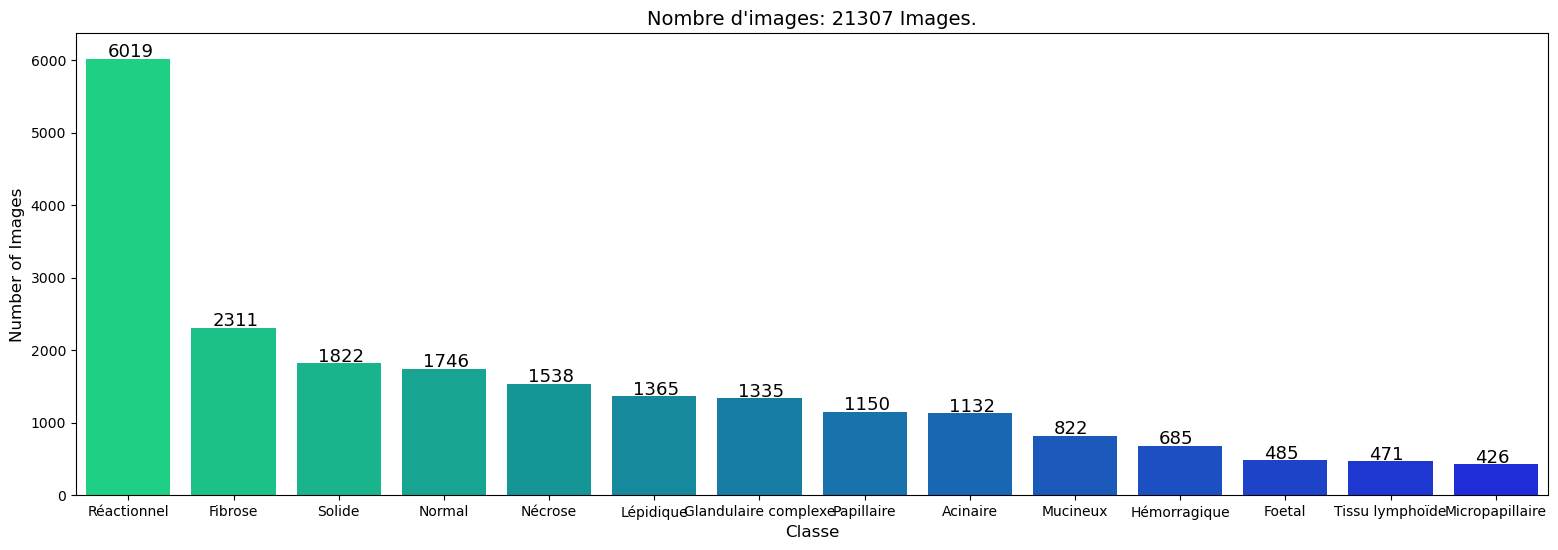

In [5]:
plt.figure(figsize=(19,6))
bar=sns.barplot(x=df_count['classe'], y=df_count["count"], palette='winter_r');
i=0
ticks=[]
ymin=0
ymax=np.max(df_count["count"])+350
for p in bar.patches:
    x = p.get_xy()[0]
    height = p.get_height()+20
    width = p.get_width()/4
    label=str(list(df_count["count"])[i])#+'('+str(np.round(100*list(selected_df['img_count'])[i]/len(df),2))+'%'+')'
    plt.text(x+width, height, label, size=13);
    plt.ylim([ymin,ymax]);
    i+=1
plt.xlabel('Classe', fontsize=12);
plt.ylabel('Number of Images', fontsize=12);
plt.title("Nombre d'images: "+str(df_count["count"].values.sum())+' Images.', fontsize=14)
plt.savefig('Statistiques des images.jpeg')
plt.show()

In [6]:
if prefix == "6C":
    all_classes={'Normal':'P', 'Réactionnel':'P', 'Hémorragique':'H', 'Nécrose':'Né', 'Tissu lymphoïde':'TL', 'Fibrose':'Fi',
                'Colloïde':'T', 'Acinaire':'T','Foetal':'T','Lépidique':'T','Mucineux':'T', 'Papillaire':'T',
                'Solide':'T', 'Glandulaire complexe':'T','Micropapillaire':'T'}
    idx_to_label = {'P':0, 'H':1, 'Né':2, 'TL':3, 'Fi':4, 'T':5}
elif prefix=="7C":
    all_classes={'Normal':'P', 'Réactionnel':'P', 'Hémorragique':'H', 'Nécrose':'Né', 'Tissu lymphoïde':'TL', 'Fibrose':'Fi',
                'Colloïde':'TuGr12', 'Acinaire':'TuGr12','Foetal':'TuGr12','Lépidique':'TuGr12','Mucineux':'TuGr12', 'Papillaire':'TuGr12',
                'Solide':'TuGr3', 'Glandulaire complexe':'TuGr3','Micropapillaire':'TuGr3'}
    idx_to_label = {'P':0, 'H':1, 'Né':2, 'TL':3, 'Fi':4, 'TuGr12':5, "TuGr3":6}
    
label_to_idx = {v:k for k,v in idx_to_label.items()}

In [7]:
label_to_idx

{0: 'P', 1: 'H', 2: 'Né', 3: 'TL', 4: 'Fi', 5: 'TuGr12', 6: 'TuGr3'}

In [8]:
df['label']=df['classe'].apply(lambda x : all_classes[x]) 
df['label'] = df['label'].apply(lambda x: idx_to_label[x])
df

,Patient,lame,patch,classe,label
1111,2,B,2_B_row_49_col_11.jpg,Acinaire,5
10064,2,B,2_B_row_21_col_27.jpg,Normal,0
1078,2,B,2_B_row_40_col_59.jpg,Acinaire,5
1088,2,B,2_B_row_50_col_25.jpg,Acinaire,5
21020,2,B,2_B_row_7_col_15.jpg,Tissu lymphoïde,3
...,...,...,...,...,...
15357,398,R,R_398_A (1493).jpg,Réactionnel,0
15391,398,R,R_398_A (806).jpg,Réactionnel,0
15312,398,R,R_398_A (857).jpg,Réactionnel,0
15400,398,R,R_398_A (312).jpg,Réactionnel,0


In [9]:
df_count=pd.DataFrame()
df_count['label']=df['label'].value_counts().index
df_count['count']=df['label'].value_counts().values
df_count['full label']=df_count['label'].apply(lambda x: label_to_idx[x])
df_count=df_count.sort_values(by='count')
df_count

,label,count,full label
6,3,471,TL
5,1,685,H
4,2,1538,Né
3,4,2311,Fi
2,6,3583,TuGr3
1,5,4954,TuGr12
0,0,7765,P


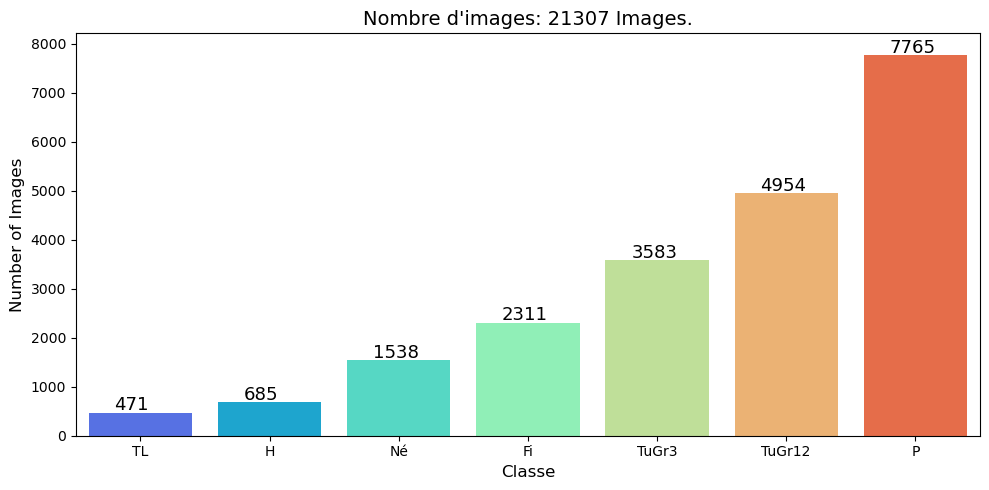

In [11]:
plt.figure(figsize=(10,5))
bar=sns.barplot(x=df_count['full label'], y=df_count["count"], palette='rainbow');
i=0
ticks=[]
ymin=0
ymax=np.max(df_count["count"])+450
for p in bar.patches:
    x = p.get_xy()[0]
    height = p.get_height()+50
    width = p.get_width()/4
    label=str(list(df_count["count"])[i])#+'('+str(np.round(100*list(selected_df['img_count'])[i]/len(df),2))+'%'+')'
    plt.text(x+width, height, label, size=13);
    plt.ylim([ymin,ymax]);
    i+=1
plt.xlabel('Classe', fontsize=12);
plt.ylabel('Number of Images', fontsize=12);
plt.title("Nombre d'images: "+str(df_count["count"].values.sum())+' Images.', fontsize=14)
plt.tight_layout()
plt.savefig(f'Statistiques des images_{prefix}.jpeg')
plt.show()

# image dist per patient

In [12]:
len(df['Patient'].unique())

27

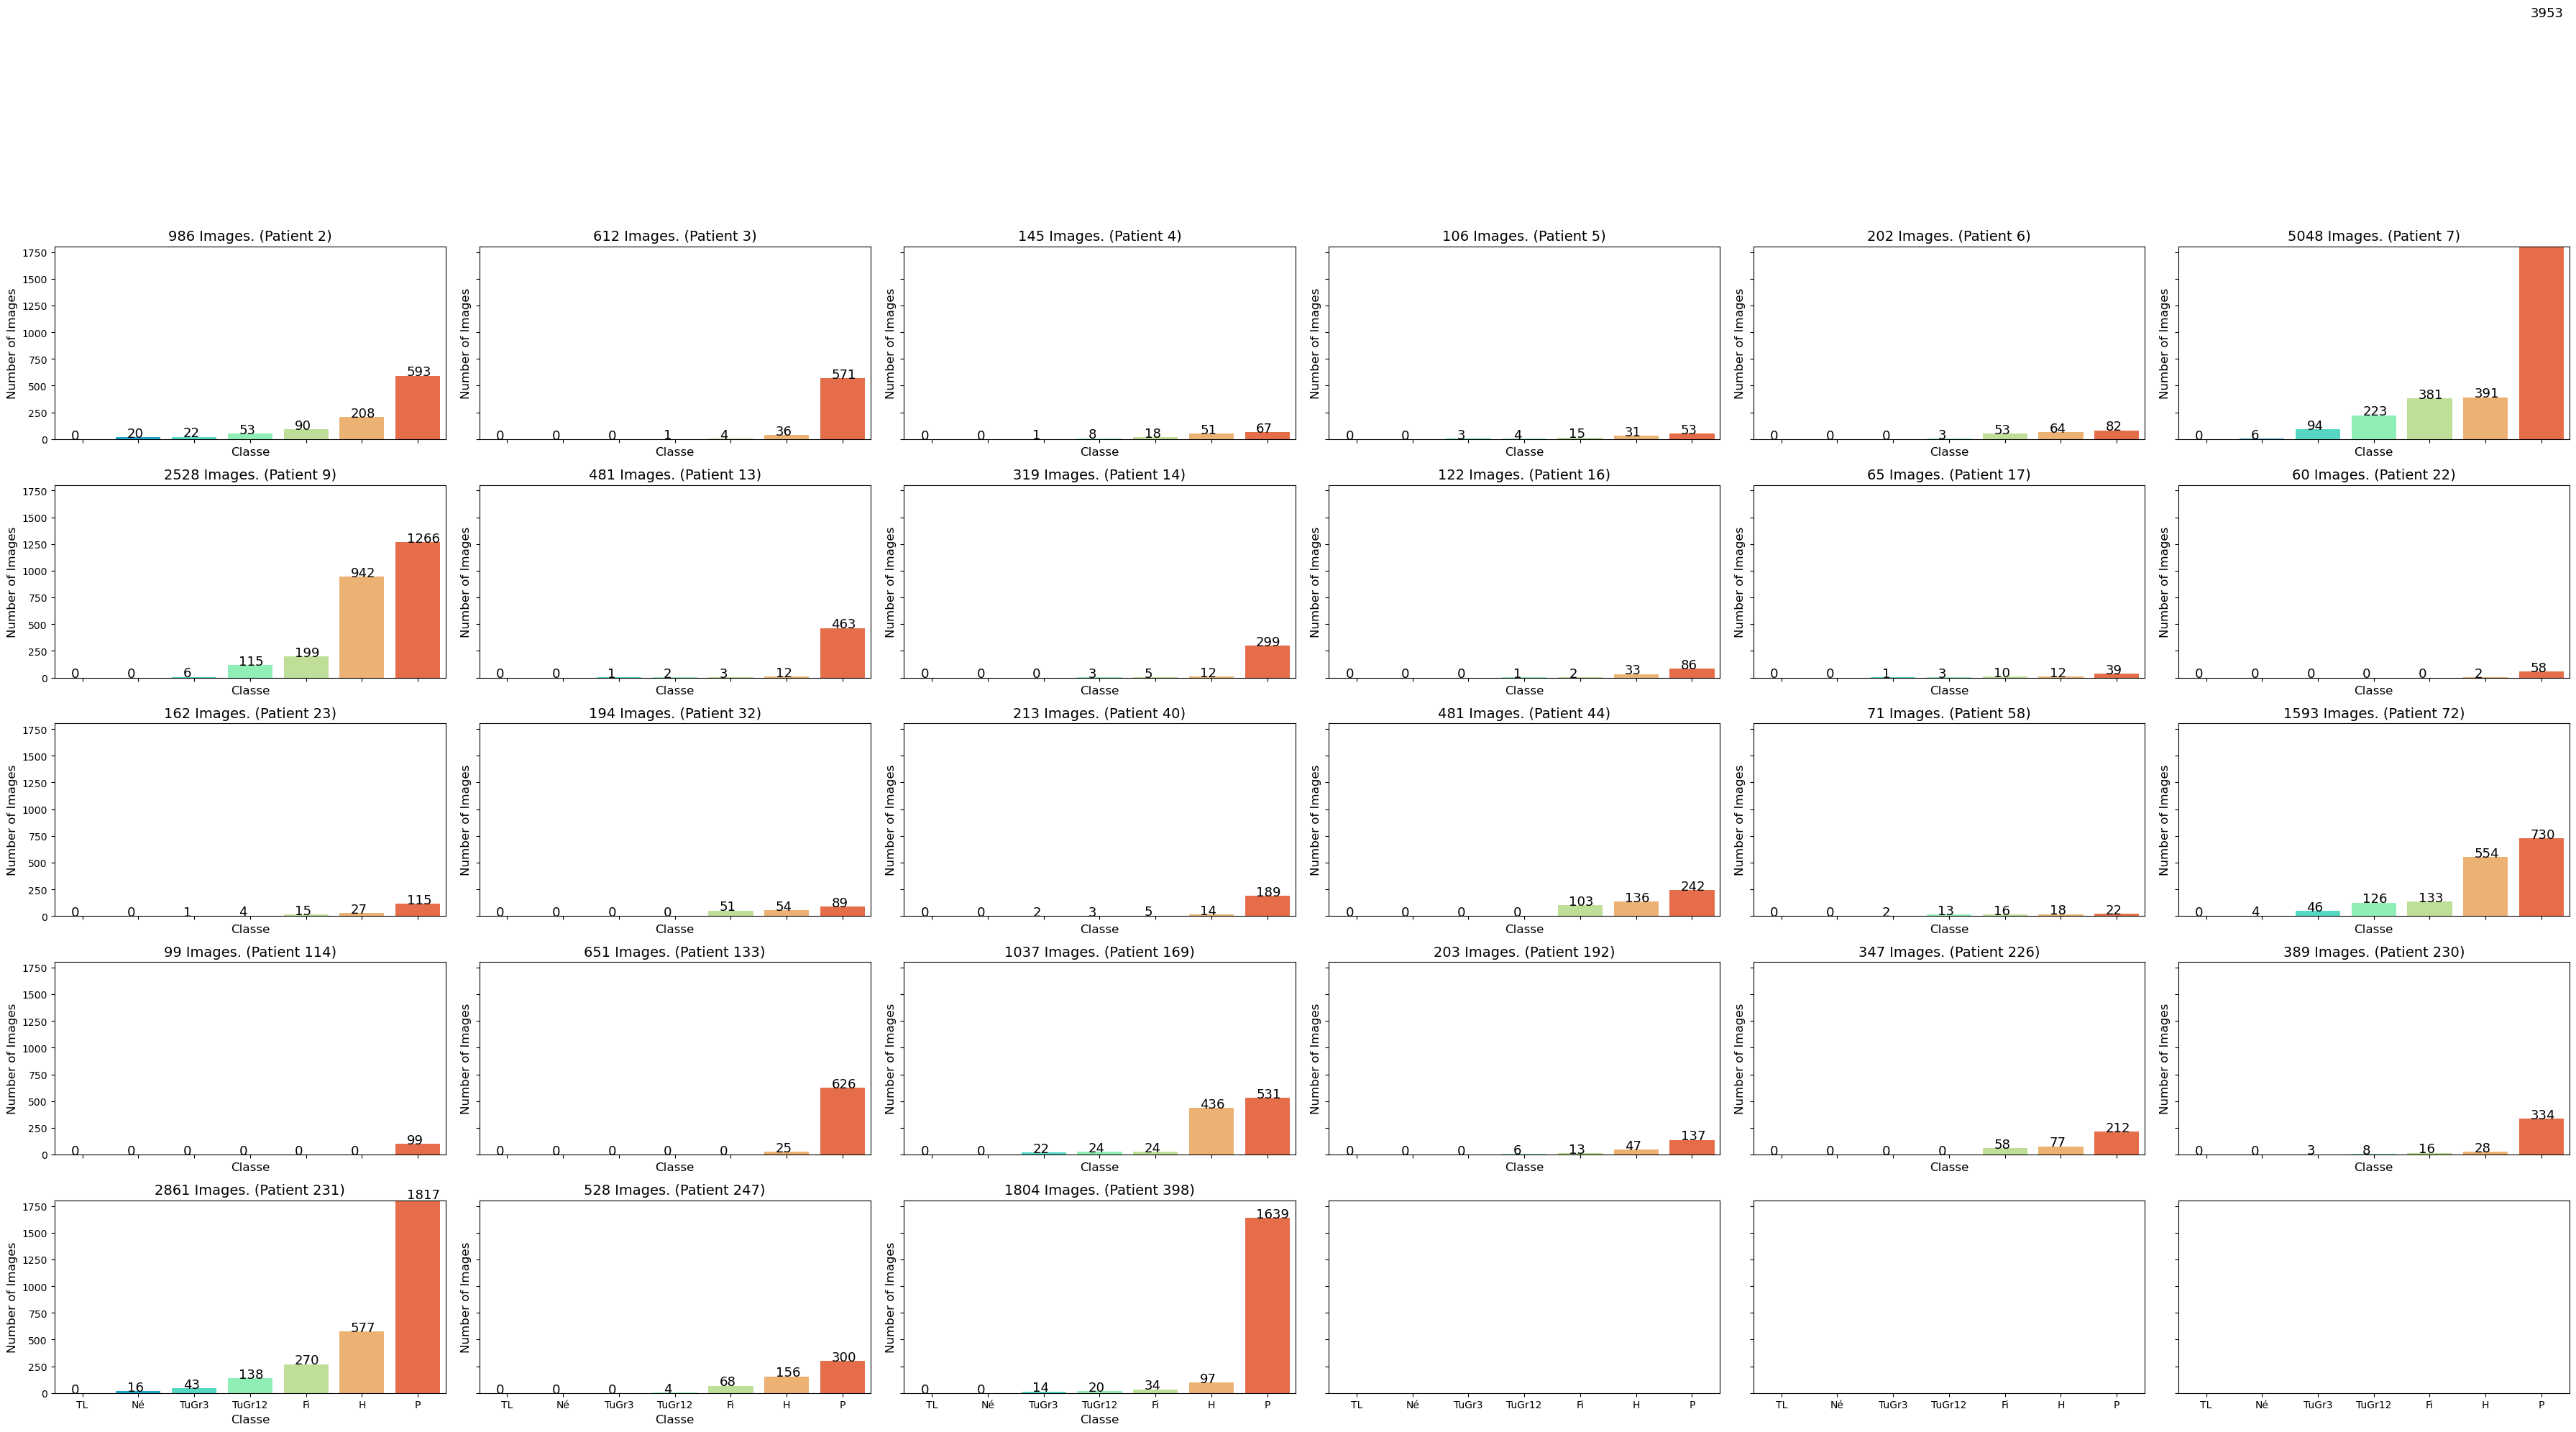

In [13]:
fig, ax = plt.subplots(ncols=6, nrows=5, figsize=(36,20), sharex=True, sharey=True)
ax = ax.flatten()
m=0
for patient in df['Patient'].unique():
    df_count=pd.DataFrame()
    dfp=df.loc[df['Patient' ]==patient]
    df_count=pd.DataFrame(columns=['label', 'count', 'full label'])
    df_count['label']=df['label'].value_counts().index
    df_count['count']=0
    df_count['full label']=df_count['label'].apply(lambda x: label_to_idx[x])
    for k,v in dfp['label'].value_counts().items():
        df_count.loc[df_count['label']==k,'count']=v
    df_count=df_count.sort_values(by='count')
    
    bar=sns.barplot(x=df_count['full label'], y=df_count["count"], palette='rainbow', ax=ax[m]);
    i=0
    ticks=[]
    for p in bar.patches:
        x = p.get_xy()[0]
        height = p.get_height()+df_count['count'].min()+1
        width = p.get_width()/4
        label=str(list(df_count["count"])[i])#+'('+str(np.round(100*list(selected_df['img_count'])[i]/len(df),2))+'%'+')'
        ax[m].text(x+width, height, label, size=13);
        i+=1
    ax[m].set_xlabel('Classe', fontsize=12);
    ax[m].set_ylabel('Number of Images', fontsize=12);
    ax[m].set_title(str(df_count["count"].values.sum())+f' Images. (Patient {patient})', fontsize=14)
    ax[m].set_ylim([0,1.1*df_count['count'].max()])
    m+=1
plt.tight_layout()
plt.show()